# Utilizing Clustering, PCA, tSNE on frog and PK datasets

1.	Anuran Calls (MFCCs) Dataset was used in anuran species recognition through their calls: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29.  Please find the dataset as “Frogs_MFCCs.csv”. The column “Species” is the true label of the samples, while other columns contain features. 

## a.	Design a K-means clustering model to predict the categories of the samples. 

In [17]:
# read data
import pandas as pd
import numpy as np
file_path = "/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 2/"
data = pd.read_csv(file_path+"Frogs_MFCCs.csv",index_col = False)

In [18]:
print(data.head())
print('the Columns', data.columns)
print('the number of samples:', len(data))

   MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0       1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1       1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2       1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3       1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4       1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   

   MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_14  MFCCs_15  MFCCs_16  MFCCs_17  \
0 -0.150063 -0.171128  0.124676  ...  0.082245  0.135752 -0.024017 -0.108351   
1 -0.222475 -0.207693  0.170883  ...  0.022786  0.163320  0.012022 -0.090974   
2 -0.242234 -0.219153  0.232538  ...  0.050791  0.207338  0.083536 -0.050691   
3 -0.194347 -0.098181  0.270375  ... -0.011567  0.100413 -0.050224 -0.136009   
4 -0.265423 -0.172700  0.266434  ...  0.037439  0.219153  0.062837 -0.048885   

   MFCCs_18  MFCCs_19  MFCCs_20  MFCCs_21  MFCCs_22         Species 

In [19]:
# checking the features' describe: min, max,....
X=data.drop(columns = ["Species"])
print(X)

      MFCCs_ 1  MFCCs_ 2  MFCCs_ 3  MFCCs_ 4  MFCCs_ 5  MFCCs_ 6  MFCCs_ 7  \
0          1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945   
1          1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835   
2          1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714   
3          1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501   
4          1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884   
...        ...       ...       ...       ...       ...       ...       ...   
7163       1.0 -0.528595 -0.208051  0.103669  0.086537  0.408476  0.069610   
7164       1.0 -0.442139 -0.328404  0.031452  0.056017  0.424856  0.073288   
7165       1.0 -0.616029 -0.302357  0.063417  0.095671  0.439930  0.069414   
7166       1.0 -0.547168 -0.266780  0.056115  0.048947  0.423631  0.081924   
7167       1.0 -0.520958 -0.258779 -0.070416 -0.025129  0.447967  0.180033   

      MFCCs_ 8  MFCCs_ 9  MFCCs_10  ...  MFCCs_13  MFCCs_14  MF

In [137]:
feature_used = data.drop(columns = ["Species"]).columns.tolist()
print("feature_used",feature_used)

feature_used ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'MFCCs_ 7', 'MFCCs_ 8', 'MFCCs_ 9', 'MFCCs_10', 'MFCCs_11', 'MFCCs_12', 'MFCCs_13', 'MFCCs_14', 'MFCCs_15', 'MFCCs_16', 'MFCCs_17', 'MFCCs_18', 'MFCCs_19', 'MFCCs_20', 'MFCCs_21', 'MFCCs_22']


In [20]:
print(X.isnull().sum())

MFCCs_ 1    0
MFCCs_ 2    0
MFCCs_ 3    0
MFCCs_ 4    0
MFCCs_ 5    0
MFCCs_ 6    0
MFCCs_ 7    0
MFCCs_ 8    0
MFCCs_ 9    0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
MFCCs_22    0
dtype: int64


In [72]:
# impute the missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
imputer.fit(X)
X_impute = np.array(imputer.transform(X),dtype = np.float32) 
X_impute

# data scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
scaler.fit(X_impute) 
X_impute_scaled = scaler.transform(X_impute) 
X_impute_scaled

array([[0.99999994, 0.49369344, 0.23010814, ..., 0.5055373 , 0.66961515,
        0.48470408],
       [0.99999994, 0.5048098 , 0.23471195, ..., 0.46027514, 0.6252369 ,
        0.5032094 ],
       [0.99999994, 0.49332333, 0.24585521, ..., 0.40575516, 0.6457649 ,
        0.56248975],
       ...,
       [0.99999994, 0.03406769, 0.09308369, ..., 0.48675472, 0.4816042 ,
        0.3474526 ],
       [0.99999994, 0.07522729, 0.11785838, ..., 0.4597409 , 0.44972467,
        0.37048924],
       [0.99999994, 0.09089339, 0.12342951, ..., 0.4814574 , 0.58313906,
        0.46917447]], dtype=float32)

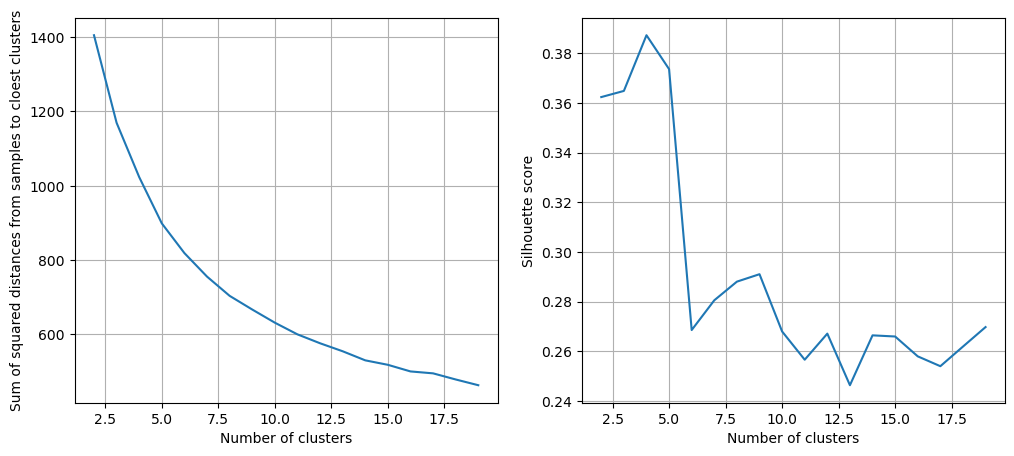

In [73]:
# find the best cluster number
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K=20
squared_distance = []
silhouette_score = []
for i in range(2, K):
    kmean= KMeans(i)
    kmean.fit(X_impute_scaled)
    squared_distance.append(kmean.inertia_) 
    silhouette_score.append(metrics.silhouette_score(X_impute_scaled,
                                                    kmean.labels_,
                                                     metric="euclidean"))
#  calculating the squared distance and silhouette score for different values of K ranging from 2 to 20. 
# The silhouette score measures how similar an object is to its own cluster compared to other clusters, 
# while the squared distance is typically used to evaluate the compactness of clusters. 

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(2, K), squared_distance)
axs[1].plot(range(2, K), silhouette_score)

axs[0].grid(True) 
axs[0].set_ylabel('Sum of squared distances from samples to cloest clusters')
axs[0].set_xlabel('Number of clusters')

axs[1].grid(True) 
axs[1].set_ylabel('Silhouette score')
axs[1].set_xlabel('Number of clusters')

plt.show()

In [74]:
# Considering the sum of squared distances and Silhouette score, 
# we determine the cluster number as 5
# produce cluster labels
labels = KMeans(5).fit(X_impute_scaled).labels_

In [75]:
labels

array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

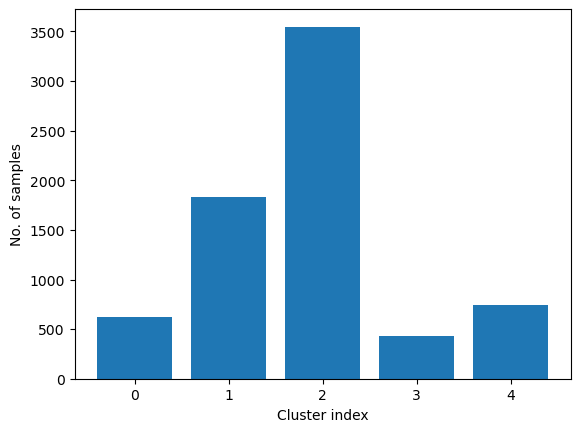

In [76]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

plt.show()

## b.	Design a hierarchical clustering model to predict the categories of the samples and  plot the dendrogram

In [26]:
from sklearn.cluster import KMeans
n_cluster = 5
kmean = KMeans(n_cluster)
kmean.fit(X_impute_scaled)

print(kmean.labels_[:200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [27]:
# we use "X_impute_scaled"
from sklearn.metrics.pairwise import euclidean_distances
import scipy.cluster.hierarchy as shc
import scipy.spatial as sp
# Calculate Euclidean distance matrix of the data,
# where each element denotes the pairwise Euclidean distance between two data points
dis_mat = euclidean_distances(X_impute_scaled)

In [28]:
# dis_mat
dis_mat.shape

(7168, 7168)

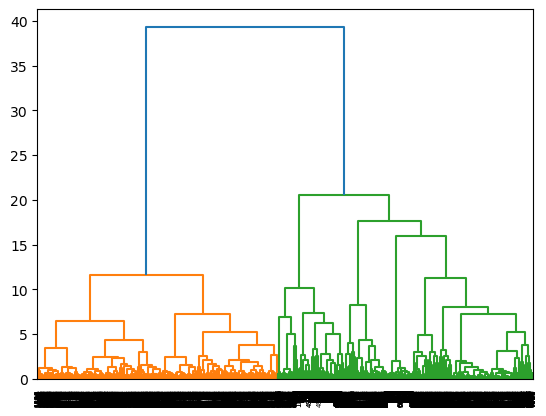

In [29]:
# generate dendrogram to determine the optimal cluster number
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
linkage = shc.linkage(sp.distance.squareform(dis_mat),
                     method = "ward" 
                     )
# "Ward" linkage minimizes the variance when forming clusters
den_plt = shc.dendrogram(linkage, orientation="top")
plt.show()

Dendrograms visualize the pairwise distances between data points and can reveal hierarchical relationships and clustering tendencies that might not be immediately apparent from silhouette scores alone

In [30]:
# According to the dendrogram, we determine the cluster number as 2
labels_hc = shc.fcluster(Z = linkage, 
                        t = 2, 
                        criterion= "maxclust")

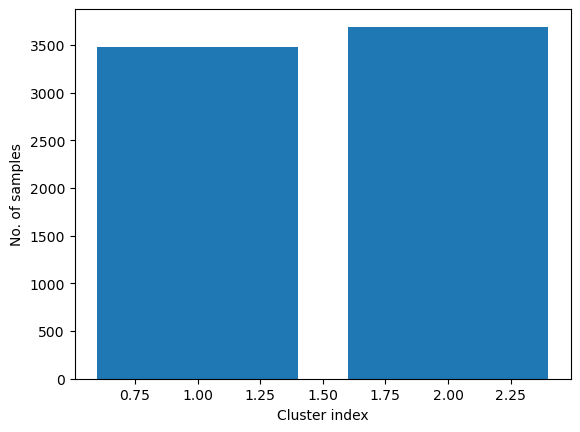

In [31]:
# visualize Cluster size distribution
import matplotlib.pyplot as plt
import numpy as np
unique_labels, lanel_cnts = np.unique(labels_hc, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")
plt.show()

## c.	Build a Gaussian mixture clustering to predict the categories of the samples. 

- Method 1

In [82]:
import pandas as pd
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5).fit(X_impute_scaled)

gmm.get_params()



{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [83]:
centers=gmm.means_
print(centers)

[[0.99999994 0.56570026 0.4478815  0.6928631  0.56323431 0.31883308
  0.34187455 0.54915069 0.61885441 0.66934077 0.44721434 0.60371701
  0.60456812 0.40713279 0.33573685 0.50883099 0.56299927 0.55795646
  0.46052589 0.29128377 0.6001329  0.70432026]
 [0.94404192 0.75656304 0.7830327  0.60867928 0.41157406 0.4310098
  0.46472768 0.54086708 0.5279496  0.61380105 0.57791252 0.65361316
  0.42972657 0.41596773 0.55107903 0.48333757 0.36400381 0.55221592
  0.5468602  0.46069364 0.55383627 0.42995671]
 [0.99999994 0.5419597  0.32345933 0.51987313 0.61361199 0.42201707
  0.47159918 0.45033615 0.396653   0.73897273 0.66965826 0.43272967
  0.34715823 0.63820399 0.60822426 0.38091918 0.30172612 0.54121038
  0.54622088 0.44566074 0.54845306 0.46674119]
 [0.99999994 0.56005719 0.60859168 0.53212131 0.46410136 0.43541494
  0.51833515 0.42578934 0.42583447 0.70707197 0.62599769 0.55518984
  0.46579724 0.49631541 0.4645351  0.4479279  0.43364224 0.5573306
  0.54502441 0.43821158 0.50950982 0.47983349

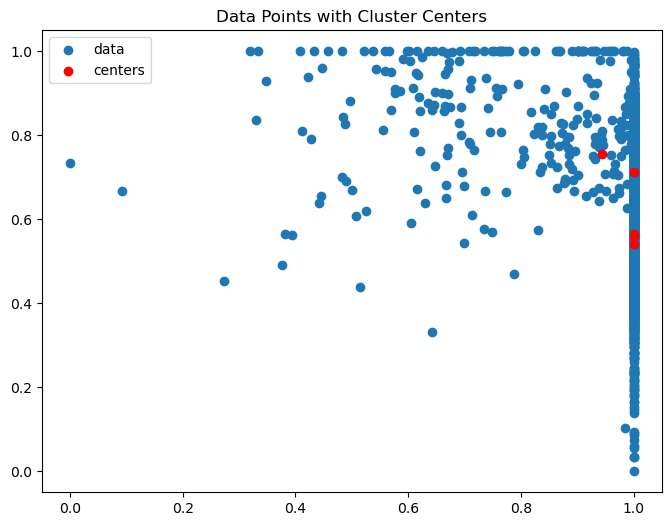

In [86]:
plt.figure(figsize=(8, 6))
plt.scatter(X_impute_scaled[:,0], X_impute_scaled[:, 1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")

plt.title('Data Points with Cluster Centers')

plt.legend()
plt.show()

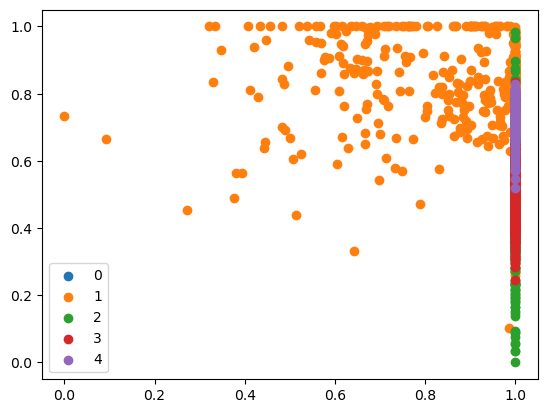

In [87]:
pred=gmm.predict(X_impute_scaled)

df=pd.DataFrame({'x':X_impute_scaled[:,0], 'y':X_impute_scaled[:,1], 'label':pred})
groups=df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)
    
ax.legend()
plt.show()

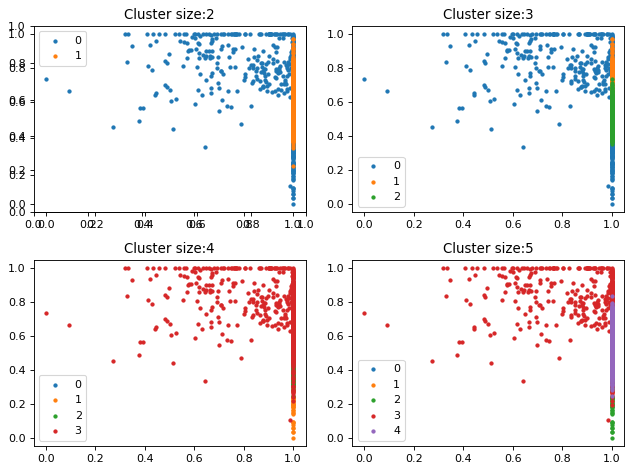

In [95]:
import pandas as pd
from sklearn.mixture import GaussianMixture
f= plt.figure(figsize=(8,6), dpi=80)
f.add_subplot(2,2,1)

for i in range (2, 6):
    gmm = GaussianMixture(n_components=i).fit(X_impute_scaled)
    pred=gmm.predict(X_impute_scaled)
    df=pd.DataFrame({'x':X_impute_scaled[:,0], 'y':X_impute_scaled[:,1], 'label':pred})
    groups=df.groupby('label')
    f.add_subplot(2,2,i-1)
    for name, group in groups:
        plt.scatter(group.x, group.y, label=name, s=8)
    
    plt.title("Cluster size:" + str(i))
    plt.legend()
    
plt.tight_layout()
plt.show()

In [96]:
gaussian_2=GaussianMixture(n_components=2, random_state=0)

Text(0, 0.5, 'No. of samples')

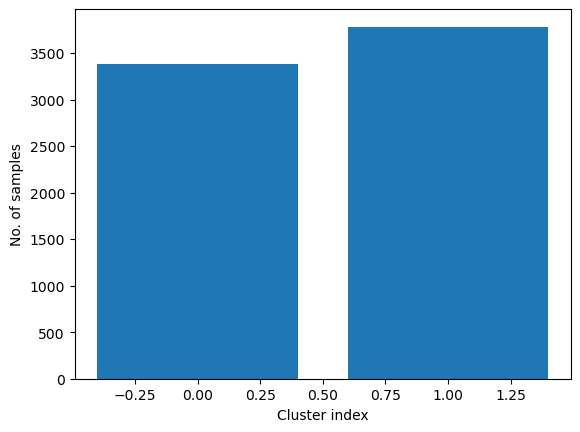

In [97]:
labels_2 = gaussian_2.fit(X_impute_scaled).predict(X_impute_scaled)
unique_labels, lanel_cnts = np.unique(labels_2, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

- Method 2

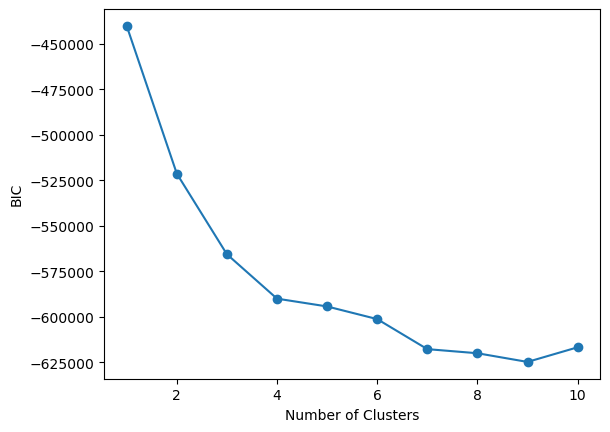

Optimal number of clusters: 9


In [129]:
import pandas as pd
from sklearn.mixture import GaussianMixture
# Fit Gaussian mixture models with increasing numbers of clusters
lowest_bic = float("inf")
bic = []
n_components_range = range(1, 11)
for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_impute_scaled)
    bic.append(gmm.bic(X_impute_scaled))
    if bic[-1] < lowest_bic:
        lowest_bic = bic[-1]
        best_gmm = gmm

# Plot the BIC values for each model
import matplotlib.pyplot as plt
plt.plot(n_components_range, bic, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.show()

# Print the optimal number of clusters
print("Optimal number of clusters: %d" % best_gmm.n_components)

In [130]:
gaussian_10=GaussianMixture(n_components=10, random_state=0)

Text(0, 0.5, 'No. of samples')

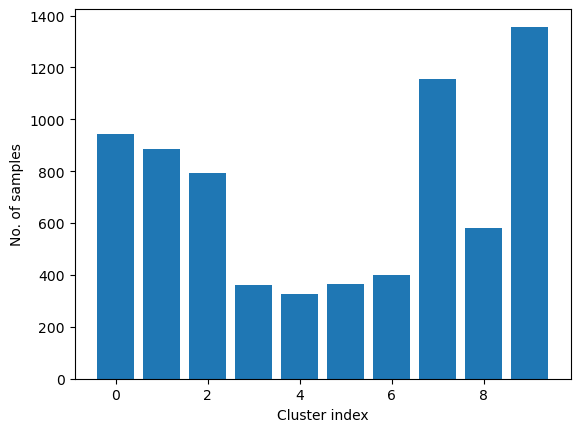

In [131]:
labels_10 = gaussian_10.fit(X_impute_scaled).predict(X_impute_scaled)
unique_labels, lanel_cnts = np.unique(labels_10, return_counts=True)
plt.bar(unique_labels, lanel_cnts)
plt.xlabel("Cluster index")
plt.ylabel("No. of samples")

## d.	After the clustering, we can consider each cluster as a class and use the class labels as supervised information. Then, we can train a supervised classification model to perform cluster assignment for new data samples. Train a classification model (e.g., decision tree) based on clustering results on (a), (b), or (c). Then use the model to predict the cluster labels of the new data in “Frogs_MFCCs_new.csv”

To evaluate the clusters, we can:

(1) Visualize the cluster label in 2D space (e.g., t-SNE)

(2) Assess characteristics of the clusters in terms of each individual feature

- Method 1: decision tree

In [171]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [172]:
labels = KMeans(5).fit(X_impute_scaled).labels_

In [173]:
labels

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [174]:
from sklearn.model_selection import train_test_split 

file_path = "/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 2/"
data = pd.read_csv(file_path+"Frogs_MFCCs.csv",index_col = False)

y = data["Species"].values

In [175]:
cluster_labels_array = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(cluster_labels_array.reshape(-1, 1),y, test_size=0.2, random_state=42)

# Step 3: Train decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [176]:
# Step 4: Predict and evaluate the model
y_pred = clf.predict(X_test)
# Evaluate the prediciton performance
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.88      0.53      0.66       146
AdenomeraHylaedactylus       0.98      1.00      0.99       705
    Ameeregatrivittata       0.52      0.99      0.68       107
            HylaMinuta       0.00      0.00      0.00        56
  HypsiboasCinerascens       0.76      0.95      0.84        80
     HypsiboasCordobae       0.63      0.93      0.75       218
   LeptodactylusFuscus       0.00      0.00      0.00        55
 OsteocephalusOophagus       0.00      0.00      0.00        32
     Rhinellagranulosa       0.00      0.00      0.00         6
           ScinaxRuber       0.00      0.00      0.00        29

              accuracy                           0.81      1434
             macro avg       0.38      0.44      0.39      1434
          weighted avg       0.75      0.81      0.77      1434



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [182]:
# Check the number of features used in the decision tree model
num_features = tree.tree_.n_features
print(num_features)
# Ensure that 'cluster_labels_array' contains only the relevant feature names or labels
cluster_labels_array = cluster_labels_array[:num_features]
print(cluster_labels_array)

22
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [183]:
# visualization decision tree
import graphviz # Run following code in command line: conda install python-graphviz 
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, out_file = None,
                           feature_names = cluster_labels_array.reshape(-1, 1), 
                           filled = True, rounded = True, 
                           special_characters = True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_2",cleanup = True) # generate PDF file in your program folder

'decision_tree_2.pdf'

[2] ≤ 0.68: This indicates the feature index (2) and the threshold value (0.68) used for splitting the data at this node. It means that if the feature at index 2 is less than or equal to 0.68, the data will follow the left branch; otherwise, it will follow the right branch.

gini = 0.8: This represents the Gini impurity or Gini index at this node. The Gini impurity is a measure of the impurity or disorder of the data at a particular node. A lower Gini impurity indicates that the node contains predominantly samples from a single class.

samples = 5734: This indicates the number of samples (data points) that reach this node during the decision tree training process.

value = [1146.8, 1146.8, 1146.8, 1146.8, 1146.8]: This represents the distribution of class labels (or target values) among the samples that reach this node. Each value in the list corresponds to the count of samples belonging to a particular class. In this case, it seems like there are five classes, and each class has approximately 1146.8 samples. The fractional values may occur due to weighted samples or if the decision tree is trained with sample weights.

- Method 2: t-SNE

In [132]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV 
knn =KNeighborsClassifier(n_neighbors=10)
knn.fit(X_impute_scaled, labels_10)

KNeighborsClassifier(n_neighbors=10)

In [133]:
new_data = pd.read_csv(file_path+"Frogs_MFCCs_new.csv",header=None)
new_data.shape

(32, 22)

In [473]:
# data scaling
pred_scaler=MinMaxScaler() 
new_data_scaled=pred_scaler.fit_transform(new_data)
pred = knn.predict(new_data_scaled)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


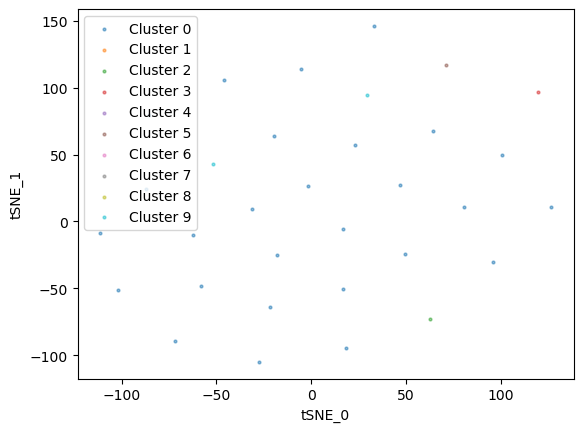

In [474]:
# Visualize the clusters in 2D t-SNE space
from sklearn.manifold import TSNE 
tsne = TSNE(n_components = 2, 
            init = "random",
            random_state = 1
           )
X_tsne = tsne.fit_transform(new_data_scaled)
# Visualize the clusters in 2D t-SNE space
for l in unique_labels: 
    plt.scatter(X_tsne[pred==l,0],X_tsne[pred==l,1],
               s = 4,
               alpha = 0.5, 
               label = "Cluster %s" % l 
                )
plt.xlabel("tSNE_0")
plt.ylabel("tSNE_1")
plt.legend() 
plt.show()

# Parkinson Dataset with replicated acoustic features Data Set 
(http://archive.ics.uci.edu/ml/datasets/Parkinson+Dataset+with+replicated+acoustic+features+) contains acoustic features extracted from 3 voice recording replications of the sustained /a/ phonation for each one of the 80 subjects (Some of them with Parkinson's Disease, i.e., status=1). 

## Find the data as Parkinson.csv file. (Hint: columns ‘ID’ and ‘Recording’ can not be considered as the features)

## a.	Visualize the data (with label distribution) in 2D PCA space 

In [184]:
# read data
import pandas as pd
import numpy as np
file_path = "/Users/Shared/Files From d.localized/Spring2023/AI/programming assignment 2/"
data = pd.read_csv(file_path+"Parkinson.csv",index_col = False)
print(data.head(5))
print('the Columns', data.columns)
print('the number of samples:', len(data))

        ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
0  CONT-01          1       0       1     0.25546    0.000015    0.001467   
1  CONT-01          2       0       1     0.36964    0.000022    0.001932   
2  CONT-01          3       0       1     0.23514    0.000013    0.001353   
3  CONT-02          1       0       0     0.29320    0.000017    0.001105   
4  CONT-02          2       0       0     0.23075    0.000015    0.001073   

   Jitter_PPQ  Shim_loc  Shim_dB  ...    Delta3    Delta4    Delta5    Delta6  \
0    0.001673  0.030256  0.26313  ...  1.407701  1.417218  1.380352  1.420670   
1    0.002245  0.023146  0.20217  ...  1.331232  1.227338  1.213377  1.352739   
2    0.001546  0.019338  0.16710  ...  1.412304  1.324674  1.276088  1.429634   
3    0.001444  0.024716  0.20892  ...  1.501200  1.534170  1.323993  1.496442   
4    0.001404  0.013119  0.11607  ...  1.508468  1.334511  1.610694  1.685021   

     Delta7    Delta8    Delta9   Delta10   Delta1

In [185]:
from sklearn.model_selection import train_test_split 
y = data['Status'].values
X = data.drop(columns = ['ID', 'Recording']).values
feature_used = data.drop(columns = ['ID', 'Recording']).columns.tolist()

In [186]:
# Data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)  
X = scaler.transform(X)

In [187]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X) 

PCA(n_components=2)

In [188]:
#pca same learn function: pca.transform
X_pca = pca.transform(X)

In [189]:
np.unique(y)

array([0, 1])

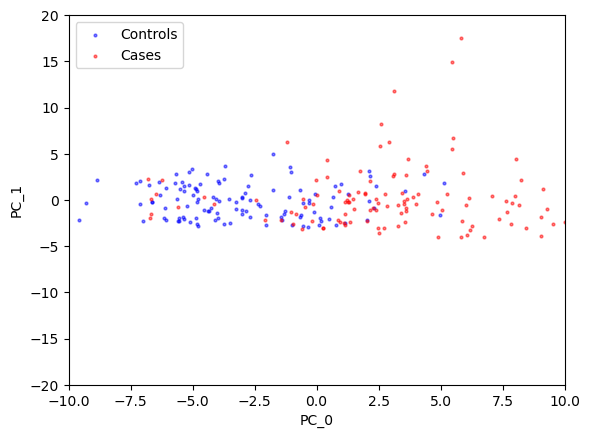

In [190]:
# visualize the training set in 2D space based on PCA
plt.scatter(X_pca[y == 0, 0],  X_pca[y == 0, 1], 
            s=4, 
            c='blue', 
            alpha=0.5,
            label='Controls', 
           )
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], 
            s=4, 
            c='red',
            alpha=0.5, 
            label='Cases', 
           )
plt.xlim(-10, 10)
plt.ylim(-20, 20)
plt.xlabel('PC_0')
plt.ylabel('PC_1')
plt.legend() 
plt.show()

## b.	Visualize the data (with label distribution) in 2D t-SNE space

In [191]:
# Data visualization based on t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, 
            init='random', # random ininitialization, other option: pca
            random_state=1)
X_tsne = tsne.fit_transform(X)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


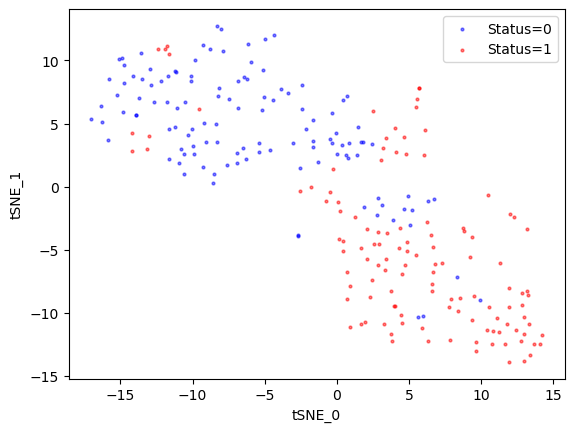

In [192]:
# visualize training set with labels, based on t-SNE
plt.scatter(X_tsne[y == 0, 0], X_tsne[y == 0, 1], 
            s=4, 
            c='blue', 
            alpha=0.5, 
            label='Status=0',
           )
plt.scatter(X_tsne[y == 1, 0], X_tsne[y == 1, 1], 
            s=4, 
            c='red', 
            alpha=0.5,
            label='Status=1',
           )
plt.xlabel('tSNE_0')
plt.ylabel('tSNE_1')
plt.legend() 
plt.show()

## c.	Features (i.e., components) extracted by PCA can be also used in downstream machine learning modeling, please extract PCA components which can capture at least 80% variance and use them to build random forest model to predict status of each sample

In [194]:
#Build prediction model based on features derived by PCA
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0) 
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

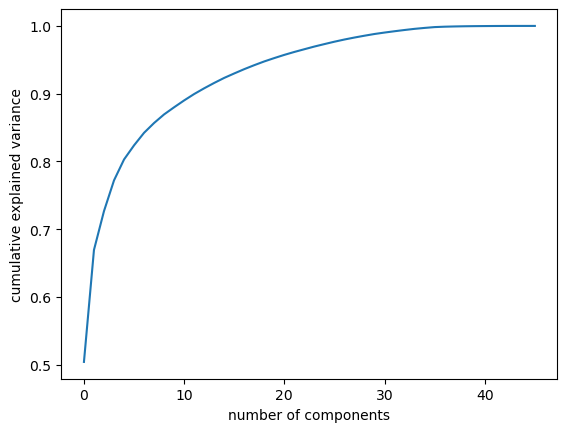

In [199]:
# fit the PCA model using training set
pca = PCA(random_state=1)
pca.fit(X_train)

# to estimate how many components are needed to describe the data.
# A vital part of using PCA in practice is the ability 
# to estimate how many components are needed to describe the data.
# explained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues) 
# Data needs to be scaled before applying PCA technique.
# This can be determined by looking at the cumulative explained 
# variance ratio as a function of the number of components.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
# a graphical representation that shows the proportion of the dataset's variance that is cumulatively explained by each component. 
# When you perform PCA, you're transforming the data into a new coordinate system with axes ranked by how well they capture the variance in the data.

In [200]:
print(X_train.shape)
np.cumsum(pca.explained_variance_ratio_)[5]

(216, 46)


0.8238024657097787

In [201]:
X_train_pca5 = pca.transform(X_train)[:, :5]
X_test_pca5 = pca.transform(X_test)[:, :5]

In [202]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
                             criterion = 'gini',
                             n_estimators=20,
                             bootstrap = True,
                             max_samples = 0.7,
                             random_state = 1
)
clf.fit(X_train_pca5, y_train)

RandomForestClassifier(max_samples=0.7, n_estimators=20, random_state=1)

In [203]:
from sklearn.metrics import roc_auc_score,roc_curve 
# make prediction on the test set 
y_proba = clf.predict_proba(X_test_pca5)[:,1] 
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_proba)

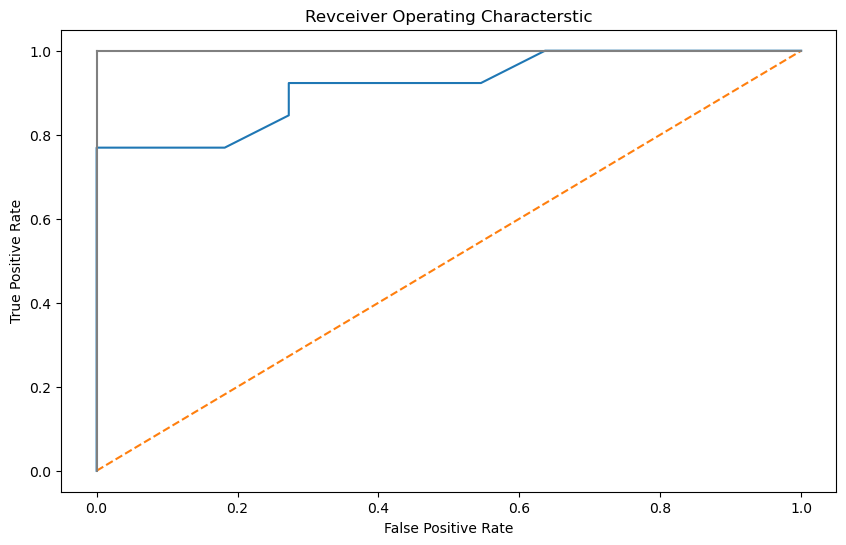

In [490]:
#Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)) 
plt.title('Revceiver Operating Characterstic') 
plt.plot(fpr_lr, tpr_lr) 
plt.plot([0,1],ls='--') 
plt.plot([0,0],[1,0],c='.5') 
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.show()

## d.	Now we want to identify sub-groups of Parkinson's Disease (PD) subjects (all subjects whose status=1), Please extract PCA components which can capture at least 80% variance of these PD subjects and use them to build Kmeans clustering model to identify PD sub-groups.

In [204]:
case_data = data[data["Status"]==1]
print(case_data)
print('the number of cases:', len(case_data)) 

          ID  Recording  Status  Gender  Jitter_rel  Jitter_abs  Jitter_RAP  \
120  PARK-01          1       1       0     0.57147    0.000043    0.003232   
121  PARK-01          2       1       0     1.87690    0.000134    0.012359   
122  PARK-01          3       1       0     0.77871    0.000057    0.004686   
123  PARK-02          1       1       0     0.28064    0.000016    0.001350   
124  PARK-02          2       1       0     0.37915    0.000021    0.002022   
..       ...        ...     ...     ...         ...         ...         ...   
235  PARK-39          2       1       0     0.57585    0.000037    0.003701   
236  PARK-39          3       1       0     0.23322    0.000015    0.001270   
237  PARK-40          1       1       0     0.26862    0.000022    0.001354   
238  PARK-40          2       1       0     0.45376    0.000037    0.002724   
239  PARK-40          3       1       0     0.34706    0.000028    0.001746   

     Jitter_PPQ  Shim_loc  Shim_dB  ...    Delta3  

In [205]:
X_d = case_data.drop(columns = ['ID', 'Recording'])
X_d.shape

(120, 46)

StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.This scaling compresses all the inliers in the narrow range.

In [206]:
# data scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler() 
scaler.fit(X_d) 
X_d_scaled = scaler.transform(X_d) 

In [207]:
X_d_scaled

array([[0.        , 0.        , 0.06244782, ..., 0.47882851, 0.66401118,
        0.53345847],
       [0.        , 0.        , 0.25775044, ..., 0.35515112, 0.60947617,
        0.42854729],
       [0.        , 0.        , 0.09345256, ..., 0.56057166, 0.75579919,
        0.58037954],
       ...,
       [0.        , 0.        , 0.01713908, ..., 0.52253186, 0.64831804,
        0.63827102],
       [0.        , 0.        , 0.04483748, ..., 0.48543381, 0.68308651,
        0.50389464],
       [0.        , 0.        , 0.02887432, ..., 0.54118458, 0.58904826,
        0.60773213]])

In [208]:
from sklearn.decomposition import PCA
pca = PCA(random_state=1) 
pca.fit(X_d_scaled)

PCA(random_state=1)

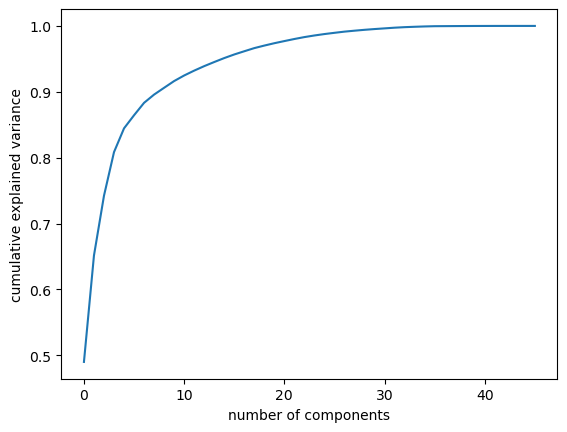

In [209]:
# to estimate how many components are needed to describe the data
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [210]:
X_d_scaled_pca5 = pca.transform(X_d_scaled)[:, :5]

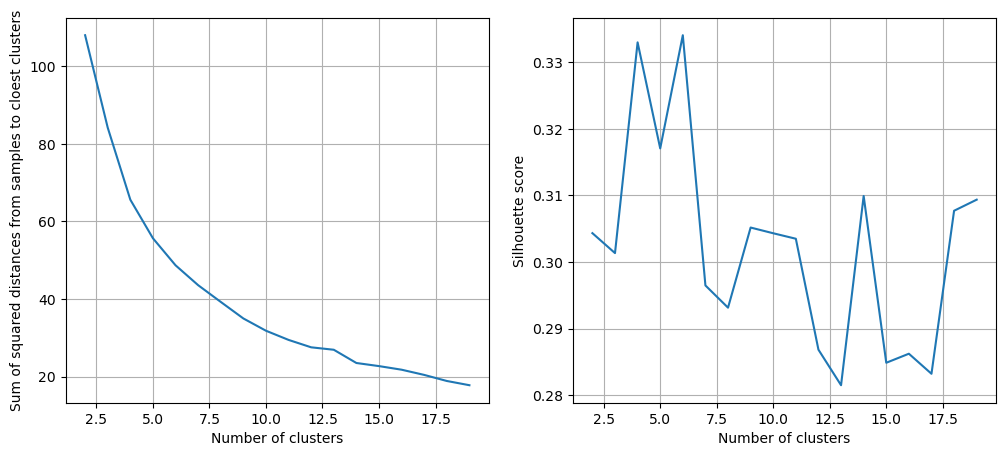

In [211]:
# find the best cluster number
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
K=20
squared_distance = []
silhouette_score = []
for i in range(2, K):
    kmean= KMeans(i)
    kmean.fit(X_d_scaled_pca5)
    squared_distance.append(kmean.inertia_) 
    silhouette_score.append(metrics.silhouette_score(X_d_scaled_pca5,
                                                    kmean.labels_,
                                                     metric="euclidean"))
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].plot(range(2, K), squared_distance)
axs[1].plot(range(2, K), silhouette_score)
#cannot tell assumption on desirable clusters
# increase size-> hard to choose ultimal number=> pick x= 7.5 as initial number of 變少-> might overfit
#set maxstep range set k vlaue -> hard to know prioir knowledge 
axs[0].grid(True) # turn the axes grids on
axs[0].set_ylabel('Sum of squared distances from samples to cloest clusters')
axs[0].set_xlabel('Number of clusters')
axs[1].grid(True) # turn the axes grids on
axs[1].set_ylabel('Silhouette score')
axs[1].set_xlabel('Number of clusters')
plt.show()
# A general rule of thumb is that a silhouette score above 0.5 indicates a good clustering, 
# a silhouette score below 0.25 indicates a bad clustering, and a silhouette score between 0.25 and 0.5 indicates a fair clustering.

In [213]:
labels = KMeans(5, random_state=0).fit(X_d_scaled_pca5).labels_
labels

array([2, 2, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 2, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 3, 1, 1, 2, 2, 4, 4, 4, 2, 1, 1, 3, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 4, 2, 2, 1, 1, 1, 3, 3,
       4, 3, 1, 1, 1, 1, 1, 2, 2, 2], dtype=int32)